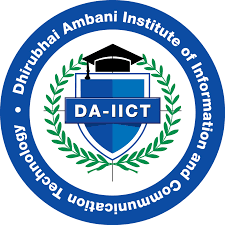

# **Group 18**



1. **Divyesh Rohit           201801086**
2. **Ishani Bandyopadhyay    201801102**
3. **Janvi Patel             201801178**
4. **Tulsi Shah              201801180**
5. **Skand Vala              201801210**


###Importing libraries

In [ ]:
#import all libraries
import numpy as np
import matplotlib.pyplot as plt 
import math
import seaborn as sns
%matplotlib inline 
from wordcloud import WordCloud ,STOPWORDS
from sklearn.naive_bayes import GaussianNB
import joblib
from sklearn.linear_model import LinearRegression  
from sklearn.preprocessing import PolynomialFeatures
from numpy import asarray
from sklearn.neighbors import KNeighborsClassifier
from numpy.random import rand
from sklearn.model_selection import train_test_split
from scipy.misc import derivative  
from sklearn import svm, datasets
import csv
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
import statistics
from numpy import arange
from sklearn.feature_selection import RFE
import random
import seaborn as sns
from sympy import *
import random
import plotly.graph_objects as go
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.preprocessing import MinMaxScaler
import imageio
import sympy as sp
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
 
# Evaluation Metrics
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics

### Importing dataset




In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
dataset = pd.read_csv('https://raw.githubusercontent.com/tulsishah309/ML_LAB/main/Hotel-Review%20-%20Sheet1%20(5).csv')

In [ ]:
dataset.shape

(1639, 6)

In [ ]:
dataset.head()

,Reviews,food,Safety and Hygiene,location,value for money,hospitality
0,"Luxurious bedrooms, quiet rooms and helpful st...",2,2,2,2,2
1,We had a marvelous stay in delhi at the trans ...,2,2,2,2,2
2,Great hotel in an excellent location with outs...,2,2,2,2,2
3,I come here often for business. They offer a v...,2,2,2,2,2
4,Comfortable room with adequate amenities. Serv...,2,1,1,1,2


In [ ]:
def wordCloud_generator(data, title=None):
    wordcloud = WordCloud(width = 800, height = 800,
                          background_color ='black',
                          min_font_size = 10
                         ).generate(" ".join(data.values))
    # plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis("off") 
    plt.tight_layout(pad = 0) 
    plt.title(title,fontsize=30)
    plt.show() 

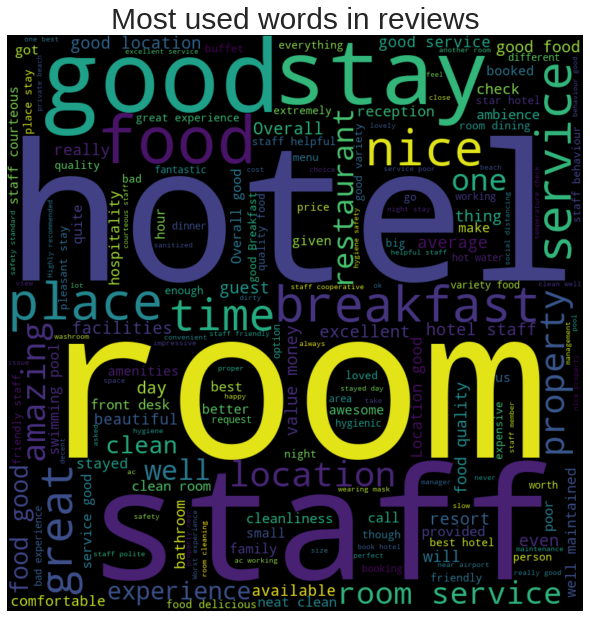

In [ ]:
wordCloud_generator(dataset['Reviews'], title="Most used words in reviews")

### Data cleaning

In [ ]:
import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
corpus=[]

for i in range(0, 1639):
  #remove all the special cheracters
  review = re.sub('[^a-zA-Z]', ' ', dataset['Reviews'][i]) 
  #convert it into lower case  
  review = review.lower()
  #remove all the stop words and stemming of the word
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
 
  review = ' '.join(review)
  
  #cleaned review
  corpus.append(review)

### Data transformation

In [ ]:
#convert data into bag of word reprsantation
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1600)


In [ ]:
X = cv.fit_transform(corpus).toarray()

#food
y1 = dataset.iloc[:, 1:2].values
#safety and hygine
y2 = dataset.iloc[:, 2:3].values
#location
y3 = dataset.iloc[:, 3:4].values
#value for money
y4 = dataset.iloc[:, 4:5].values
#hospitality
y5 = dataset.iloc[:, 5:6].values

y =[]
y.append(y1)
y.append(y2)
y.append(y3)
y.append(y4)
y.append(y5)

In [ ]:
# Saving Bag of words dictionary to later use in prediction
import pickle
bow_path = './drive/MyDrive/ML/c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))
drive = ['./drive/MyDrive/ML/c1_Classifier_Sentiment_Model_naive',
         './drive/MyDrive/ML/c2_Classifier_Sentiment_Model_naive',
         './drive/MyDrive/ML/c3_Classifier_Sentiment_Model_naive',
         './drive/MyDrive/ML/c4_Classifier_Sentiment_Model_naive',
         './drive/MyDrive/ML/c5_Classifier_Sentiment_Model_naive']

types = ['Food','Safety and Hygiene','Locatiion','Value for money','Hospitality']

### Model fitting (Naive Bayes)

Accuracy of  Food  :  0.774390243902439
Recall      :  0.774390243902439
Precision   :  0.8309282057423045
F1 Score    :  0.7743902439024389
Accuracy of  Safety and Hygiene  :  0.7652439024390244
Recall      :  0.7652439024390244
Precision   :  0.8471972916063985
F1 Score    :  0.7652439024390245
Accuracy of  Locatiion  :  0.7347560975609756
Recall      :  0.7347560975609756
Precision   :  0.8157969541651939
F1 Score    :  0.7347560975609757
Accuracy of  Value for money  :  0.7774390243902439
Recall      :  0.7774390243902439
Precision   :  0.8268240767647083
F1 Score    :  0.7774390243902439
Accuracy of  Hospitality  :  0.7835365853658537
Recall      :  0.7835365853658537
Precision   :  0.8508443869106114
F1 Score    :  0.7835365853658537


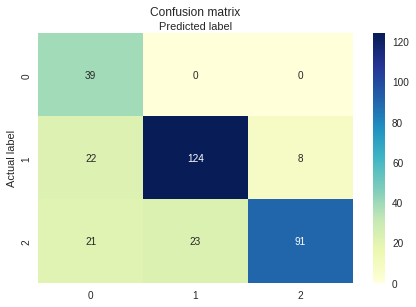

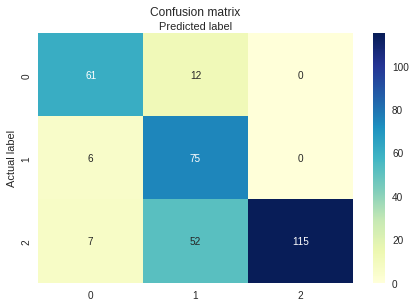

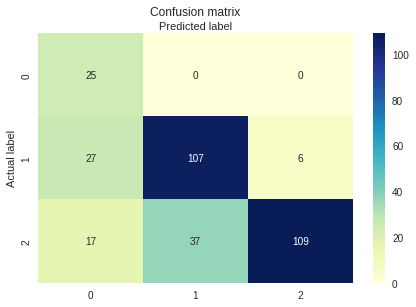

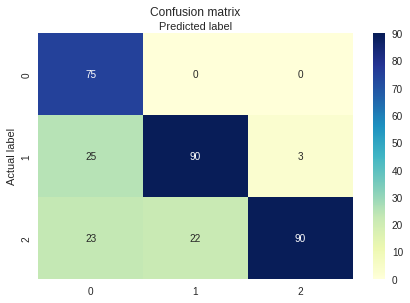

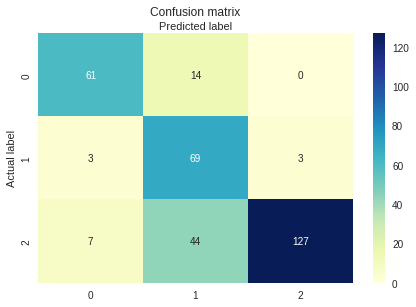

In [ ]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y[i].ravel(), test_size = 0.2, random_state = 0)

   
    classifier = GaussianNB()
    
    
    classifier.fit(X_train, y_train)

    
    joblib.dump(classifier,drive[i]) 

    y_pred = classifier.predict(X_test)
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    ac_sc = accuracy_score(y_test, y_pred)
    rc_sc = recall_score(y_test, y_pred, average="weighted")
    pr_sc = precision_score(y_test, y_pred, average="weighted")
    f1_sc = f1_score(y_test, y_pred, average='micro')

    print("Accuracy of ",types[i]," : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    

###Model performance

K Nearest Neighbour classifier




In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = './drive/MyDrive/ML/c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))
drive = ['./drive/MyDrive/ML/c1_Classifier_Sentiment_Model_kNN',
         './drive/MyDrive/ML/c2_Classifier_Sentiment_Model_kNN',
         './drive/MyDrive/ML/c3_Classifier_Sentiment_Model_kNN',
         './drive/MyDrive/ML/c4_Classifier_Sentiment_Model_kNN',
         './drive/MyDrive/ML/c5_Classifier_Sentiment_Model_kNN']

types = ['Food','Safety and Hygiene','Locatiion','Value for money','Hospitality']

Accuracy    :  0.5945121951219512
Recall      :  0.5945121951219512
Precision   :  0.5904544195778375
F1 Score    :  0.5945121951219512
Accuracy    :  0.6432926829268293
Recall      :  0.6432926829268293
Precision   :  0.6357134100938924
F1 Score    :  0.6432926829268293
Accuracy    :  0.6341463414634146
Recall      :  0.6341463414634146
Precision   :  0.6164453880828495
F1 Score    :  0.6341463414634146
Accuracy    :  0.5487804878048781
Recall      :  0.5487804878048781
Precision   :  0.5712713689261921
F1 Score    :  0.5487804878048781
Accuracy    :  0.676829268292683
Recall      :  0.676829268292683
Precision   :  0.6810468719352414
F1 Score    :  0.676829268292683


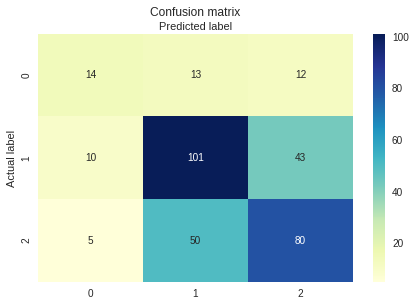

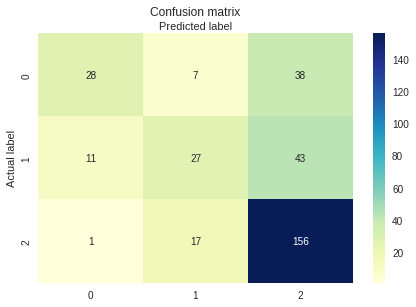

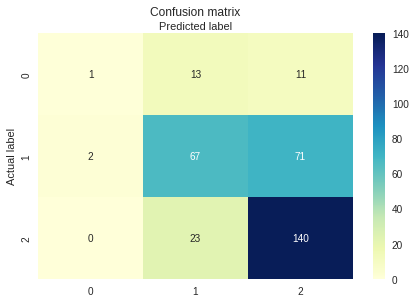

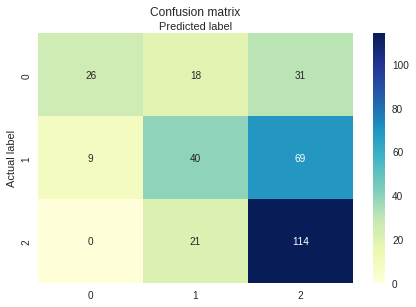

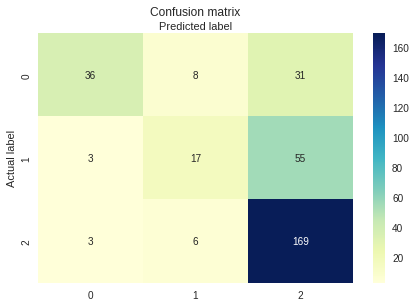

In [ ]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y[i].ravel(), test_size = 0.20, random_state = 0)

      
    knn = KNeighborsClassifier(n_neighbors=14)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    joblib.dump(knn,drive[i]) 


    # Calculate the accuracy of the model
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    ac_sc = accuracy_score(y_test, y_pred)
    rc_sc = recall_score(y_test, y_pred, average="weighted")
    pr_sc = precision_score(y_test, y_pred, average="weighted")
    f1_sc = f1_score(y_test, y_pred, average='micro')

    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

Logistic Regression

In [ ]:
# Saving BoW dictionary to later use in prediction
import pickle
bow_path = './drive/MyDrive/ML/c1_BoW_Sentiment_Model.pkl'
pickle.dump(cv, open(bow_path, "wb"))
drive = ['./drive/MyDrive/ML/c1_Classifier_Sentiment_Model_log',
         './drive/MyDrive/ML/c2_Classifier_Sentiment_Model_log',
         './drive/MyDrive/ML/c3_Classifier_Sentiment_Model_log',
         './drive/MyDrive/ML/c4_Classifier_Sentiment_Model_log',
         './drive/MyDrive/ML/c5_Classifier_Sentiment_Model_log']

types = ['Food','Safety and Hygiene','Locatiion','Value for money','Hospitality']

Accuracy    :  0.8978658536585366
Recall      :  0.8978658536585366
Precision   :  0.8986411210369265
F1 Score    :  0.8978658536585367
Accuracy    :  0.899390243902439
Recall      :  0.899390243902439
Precision   :  0.8988836241109919
F1 Score    :  0.899390243902439
Accuracy    :  0.913109756097561
Recall      :  0.913109756097561
Precision   :  0.9140317253884327
F1 Score    :  0.913109756097561
Accuracy    :  0.8780487804878049
Recall      :  0.8780487804878049
Precision   :  0.8844721668003392
F1 Score    :  0.8780487804878049
Accuracy    :  0.9314024390243902
Recall      :  0.9314024390243902
Precision   :  0.9321291352169809
F1 Score    :  0.9314024390243902


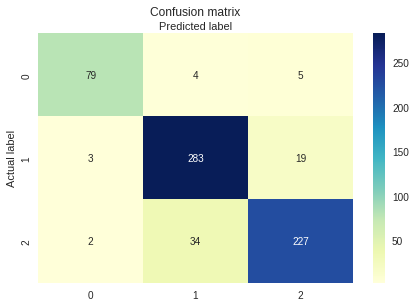

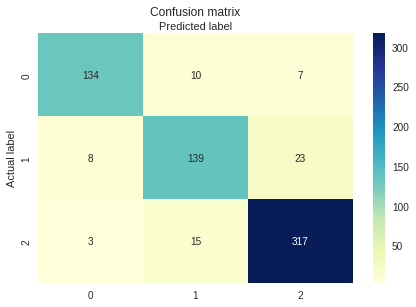

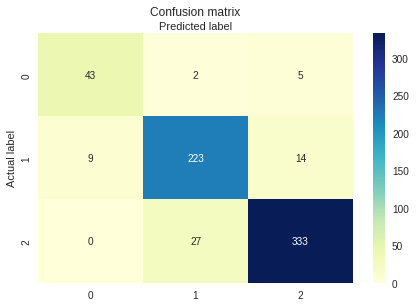

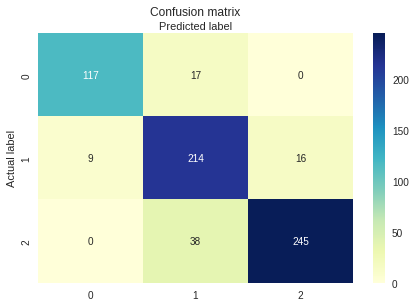

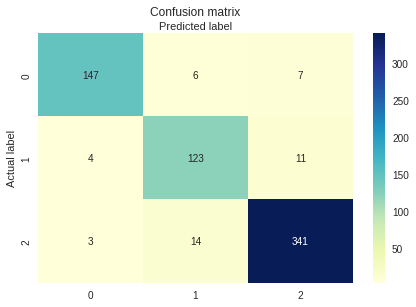

In [ ]:
for i in range(5):
    X_train, X_test, y_train, y_test = train_test_split(X, y[i].ravel(), test_size = 0.40, random_state = 1)

    model = LogisticRegression(multi_class='auto', solver='lbfgs')
    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)
    joblib.dump(model,drive[i]) 


    # Calculate the accuracy of the model
    cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
    class_names=[0,1,2] # name  of classes
    ac_sc = accuracy_score(y_test, y_pred)
    rc_sc = recall_score(y_test, y_pred, average="weighted")
    pr_sc = precision_score(y_test, y_pred, average="weighted")
    f1_sc = f1_score(y_test, y_pred, average='micro')

    print("Accuracy    : ", ac_sc)
    print("Recall      : ", rc_sc)
    print("Precision   : ", pr_sc)
    print("F1 Score    : ", f1_sc)
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')